In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore

# Read the dataset
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)

# Add columns,Descriptive analytics
print("Shape of the dataset: ", dataset.shape)
dataset.columns = ['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_ash',
                  'magnesium', 'total_phenol', 'flavanoids', 'nonflavanoid_phenols',
                  'proanthocyanins', 'color_intensity', 'hue', 'diluted_wines',
                  'proline']


# Check the imported dataset
dataset.tail(5)

Shape of the dataset:  (178, 14)


,class,alcohol,malic_acid,ash,alcalinity_ash,magnesium,total_phenol,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [5]:
dataset.dtypes


class                     int64
alcohol                 float64
malic_acid              float64
ash                     float64
alcalinity_ash          float64
magnesium                 int64
total_phenol            float64
flavanoids              float64
nonflavanoid_phenols    float64
proanthocyanins         float64
color_intensity         float64
hue                     float64
diluted_wines           float64
proline                   int64
dtype: object

In [6]:
dataset.isnull().sum()

class                   0
alcohol                 0
malic_acid              0
ash                     0
alcalinity_ash          0
magnesium               0
total_phenol            0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
diluted_wines           0
proline                 0
dtype: int64

In [7]:
#heat map for correlation just to know the  quantified relation between the variable
#calculate the correlation matrix
corr = dataset.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)


#draw the correlation table 
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,class,alcohol,malic_acid,ash,alcalinity_ash,magnesium,total_phenol,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline
class,1,-0.33,0.44,-0.05,0.52,-0.21,-0.72,-0.85,0.49,-0.5,0.27,-0.62,-0.79,-0.63
alcohol,-0.33,1,0.094,0.21,-0.31,0.27,0.29,0.24,-0.16,0.14,0.55,-0.072,0.072,0.64
malic_acid,0.44,0.094,1,0.16,0.29,-0.055,-0.34,-0.41,0.29,-0.22,0.25,-0.56,-0.37,-0.19
ash,-0.05,0.21,0.16,1,0.44,0.29,0.13,0.12,0.19,0.0097,0.26,-0.075,0.0039,0.22
alcalinity_ash,0.52,-0.31,0.29,0.44,1,-0.083,-0.32,-0.35,0.36,-0.2,0.019,-0.27,-0.28,-0.44
magnesium,-0.21,0.27,-0.055,0.29,-0.083,1,0.21,0.2,-0.26,0.24,0.2,0.055,0.066,0.39
total_phenol,-0.72,0.29,-0.34,0.13,-0.32,0.21,1,0.86,-0.45,0.61,-0.055,0.43,0.7,0.5
flavanoids,-0.85,0.24,-0.41,0.12,-0.35,0.2,0.86,1,-0.54,0.65,-0.17,0.54,0.79,0.49
nonflavanoid_phenols,0.49,-0.16,0.29,0.19,0.36,-0.26,-0.45,-0.54,1,-0.37,0.14,-0.26,-0.5,-0.31
proanthocyanins,-0.5,0.14,-0.22,0.0097,-0.2,0.24,0.61,0.65,-0.37,1,-0.025,0.3,0.52,0.33


In [8]:
wine_data_std = StandardScaler().fit_transform(dataset)

pd.DataFrame(wine_data_std).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,178.0,-9.056426e-16,1.002821,-1.213944,-1.213944,0.079960,1.373864,1.373864
1,178.0,-8.619821e-16,1.002821,-2.434235,-0.788245,0.061000,0.836129,2.259772
2,178.0,-8.357859e-17,1.002821,-1.432983,-0.658749,-0.423112,0.669793,3.109192
3,178.0,-8.657245e-16,1.002821,-3.679162,-0.572122,-0.023821,0.698109,3.156325
4,178.0,-1.160121e-16,1.002821,-2.671018,-0.689137,0.001518,0.602088,3.154511
5,178.0,-1.995907e-17,1.002821,-2.088255,-0.824415,-0.122282,0.509638,4.371372
6,178.0,-2.972030e-16,1.002821,-2.107246,-0.885468,0.095960,0.808997,2.539515
7,178.0,-4.016762e-16,1.002821,-1.695971,-0.827539,0.106150,0.849085,3.062832
8,178.0,4.079134e-16,1.002821,-1.868234,-0.740141,-0.176095,0.609541,2.402403
9,178.0,-1.699639e-16,1.002821,-2.069034,-0.597284,-0.062898,0.629175,3.485073


In [9]:
cov_matrix = np.cov(wine_data_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00564972 -0.3300763   0.44024952 -0.04992369  0.52078487 -0.21036119
  -0.72322641 -0.85228566  0.49187249 -0.50194977  0.26716852 -0.62085717
  -0.79268286 -0.63729711]
 [-0.3300763   1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816
   0.29073446  0.23815287 -0.15681042  0.13747022  0.549451   -0.07215255
   0.07275191  0.64735687]
 [ 0.44024952  0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343
  -0.3370606  -0.41332866  0.29463237 -0.22199334  0.25039204 -0.56446685
  -0.37079354 -0.19309537]
 [-0.04992369  0.21273976  0.16497228  1.00564972  0.44587209  0.28820583
   0.12970824  0.11572743  0.1872826   0.00970647  0.2603499  -0.07508874
   0.00393333  0.22488969]
 [ 0.52078487 -0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039
  -0.32292752 -0.353355    0.36396647 -0.19844168  0.01883781 -0.27550299
  -0.27833221 -0.44308618]
 [-0.21036119  0.27232816 -0.05488343  0.28820583 -0.0838039   1.00564972
   0.21561254  0.19688989 -0.2

In [10]:
cov_matrix = np.cov(wine_data_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00564972 -0.3300763   0.44024952 -0.04992369  0.52078487 -0.21036119
  -0.72322641 -0.85228566  0.49187249 -0.50194977  0.26716852 -0.62085717
  -0.79268286 -0.63729711]
 [-0.3300763   1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816
   0.29073446  0.23815287 -0.15681042  0.13747022  0.549451   -0.07215255
   0.07275191  0.64735687]
 [ 0.44024952  0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343
  -0.3370606  -0.41332866  0.29463237 -0.22199334  0.25039204 -0.56446685
  -0.37079354 -0.19309537]
 [-0.04992369  0.21273976  0.16497228  1.00564972  0.44587209  0.28820583
   0.12970824  0.11572743  0.1872826   0.00970647  0.2603499  -0.07508874
   0.00393333  0.22488969]
 [ 0.52078487 -0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039
  -0.32292752 -0.353355    0.36396647 -0.19844168  0.01883781 -0.27550299
  -0.27833221 -0.44308618]
 [-0.21036119  0.27232816 -0.05488343  0.28820583 -0.0838039   1.00564972
   0.21561254  0.19688989 -0.2

In [13]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.39366953 -0.00569041 -0.00121795 -0.12246373 -0.15758395  0.20033864
   0.05938234 -0.66904528  0.49224318  0.07179553  0.01575769 -0.16236882
  -0.19899373  0.01444169]
 [ 0.13632501 -0.48416087  0.20740081  0.08191848  0.25089415 -0.13517139
   0.09269887 -0.09062605  0.05610645  0.42154435 -0.26411262 -0.45019071
   0.31127983 -0.22154641]
 [-0.22267638 -0.22359095 -0.08879606 -0.46988824  0.18860015 -0.59841948
  -0.3743698   0.02522531 -0.06675544  0.08757556  0.1192121  -0.00602569
  -0.32592413  0.06839251]
 [ 0.00225793 -0.31585588 -0.62610236  0.24984122  0.0935236  -0.10799983
   0.16708856  0.00163582  0.19201787 -0.17208034 -0.04502305  0.26249446
  -0.12452347 -0.49452428]
 [-0.22429849  0.01161574 -0.6119896  -0.07199322 -0.0465675   0.08811224
   0.26872469  0.09536107 -0.20007784  0.41324857 -0.06131271 -0.11863342
   0.15716811  0.47461722]
 [ 0.12463016 -0.30055143 -0.13098458  0.16321412 -0.77833048 -0.14483831
  -0.32957951 -0.02230075 -0.0582

In [14]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.39366953 -0.00569041 -0.00121795 -0.12246373 -0.15758395  0.20033864
   0.05938234 -0.66904528  0.49224318  0.07179553  0.01575769 -0.16236882
  -0.19899373  0.01444169]
 [ 0.13632501 -0.48416087  0.20740081  0.08191848  0.25089415 -0.13517139
   0.09269887 -0.09062605  0.05610645  0.42154435 -0.26411262 -0.45019071
   0.31127983 -0.22154641]
 [-0.22267638 -0.22359095 -0.08879606 -0.46988824  0.18860015 -0.59841948
  -0.3743698   0.02522531 -0.06675544  0.08757556  0.1192121  -0.00602569
  -0.32592413  0.06839251]
 [ 0.00225793 -0.31585588 -0.62610236  0.24984122  0.0935236  -0.10799983
   0.16708856  0.00163582  0.19201787 -0.17208034 -0.04502305  0.26249446
  -0.12452347 -0.49452428]
 [-0.22429849  0.01161574 -0.6119896  -0.07199322 -0.0465675   0.08811224
   0.26872469  0.09536107 -0.20007784  0.41324857 -0.06131271 -0.11863342
   0.15716811  0.47461722]
 [ 0.12463016 -0.30055143 -0.13098458  0.16321412 -0.77833048 -0.14483831
  -0.32957951 -0.02230075 -0.0582

In [15]:
print("Eigen Values:")
pd.DataFrame(eig_vals).transpose()

Eigen Values:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,5.567225,2.511184,1.454244,0.93316,0.88246,0.676579,0.556928,0.058139,0.130296,0.352012,0.16975,0.296206,0.263788,0.227124


In [16]:
print("Eigen Values:")
pd.DataFrame(eig_vals).transpose()

Eigen Values:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,5.567225,2.511184,1.454244,0.93316,0.88246,0.676579,0.556928,0.058139,0.130296,0.352012,0.16975,0.296206,0.263788,0.227124


In [17]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [  39.54248599   57.3787449    67.70784649   74.33583098   80.60370611
   85.40926568   89.36497253   91.8652166    93.96908761   95.8427026
   97.45590561   98.66159643   99.58705485  100.        ]


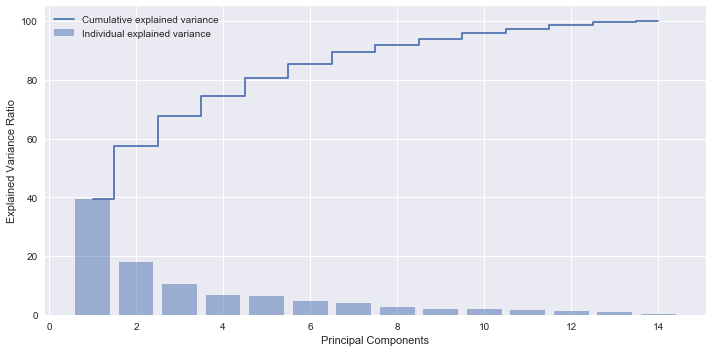

In [18]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

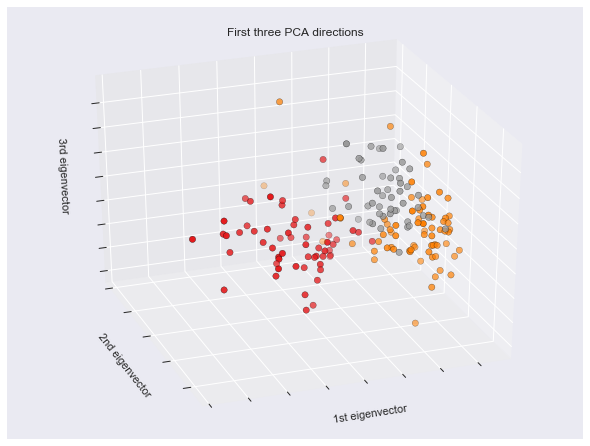

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(dataset)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=dataset.iloc[:,0].values,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()